In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [34]:
df = pd.read_csv("haberman.csv")
df

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [35]:
df.columns = ["age","Operation_year","Axil_nodes", "Surv_status"]
print(df.columns)

Index(['age', 'Operation_year', 'Axil_nodes', 'Surv_status'], dtype='object')


In [36]:
df.info

<bound method DataFrame.info of      age  Operation_year  Axil_nodes  Surv_status
0     30              62           3            1
1     30              65           0            1
2     31              59           2            1
3     31              65           4            1
4     33              58          10            1
..   ...             ...         ...          ...
300   75              62           1            1
301   76              67           0            1
302   77              65           3            1
303   78              65           1            2
304   83              58           2            2

[305 rows x 4 columns]>

In [37]:
df.describe()

,age,Operation_year,Axil_nodes,Surv_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


through the above we can interpret that the max and min age of person that is operated is 30 and 83 year so that is no person who suffer from the cancer of age less than 30 and more than 83.

In [38]:
df.median()   

age               52.0
Operation_year    63.0
Axil_nodes         1.0
Surv_status        1.0
dtype: float64

the median of operation year and mean of operation is 63 and 62.849180 and standard deviation is 3.254078 so most of the operation held in mean +- std.

In [39]:
df.head(10)

,age,Operation_year,Axil_nodes,Surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
5,33,60,0,1
6,34,59,0,2
7,34,66,9,2
8,34,58,30,1
9,34,60,1,1


In [61]:
df["Surv_status"]= df["Surv_status"].replace([1,2], ["Survied","died"])
#df["Surv_status"] = df["Surv_status"].replace([2],"died")
df["Surv_status"].value_counts()

Survied    224
died        81
Name: Surv_status, dtype: int64

In [62]:
df.head(10)

,age,Operation_year,Axil_nodes,Surv_status
0,30,62,3,Survied
1,30,65,0,Survied
2,31,59,2,Survied
3,31,65,4,Survied
4,33,58,10,Survied
5,33,60,0,Survied
6,34,59,0,died
7,34,66,9,died
8,34,58,30,Survied
9,34,60,1,Survied


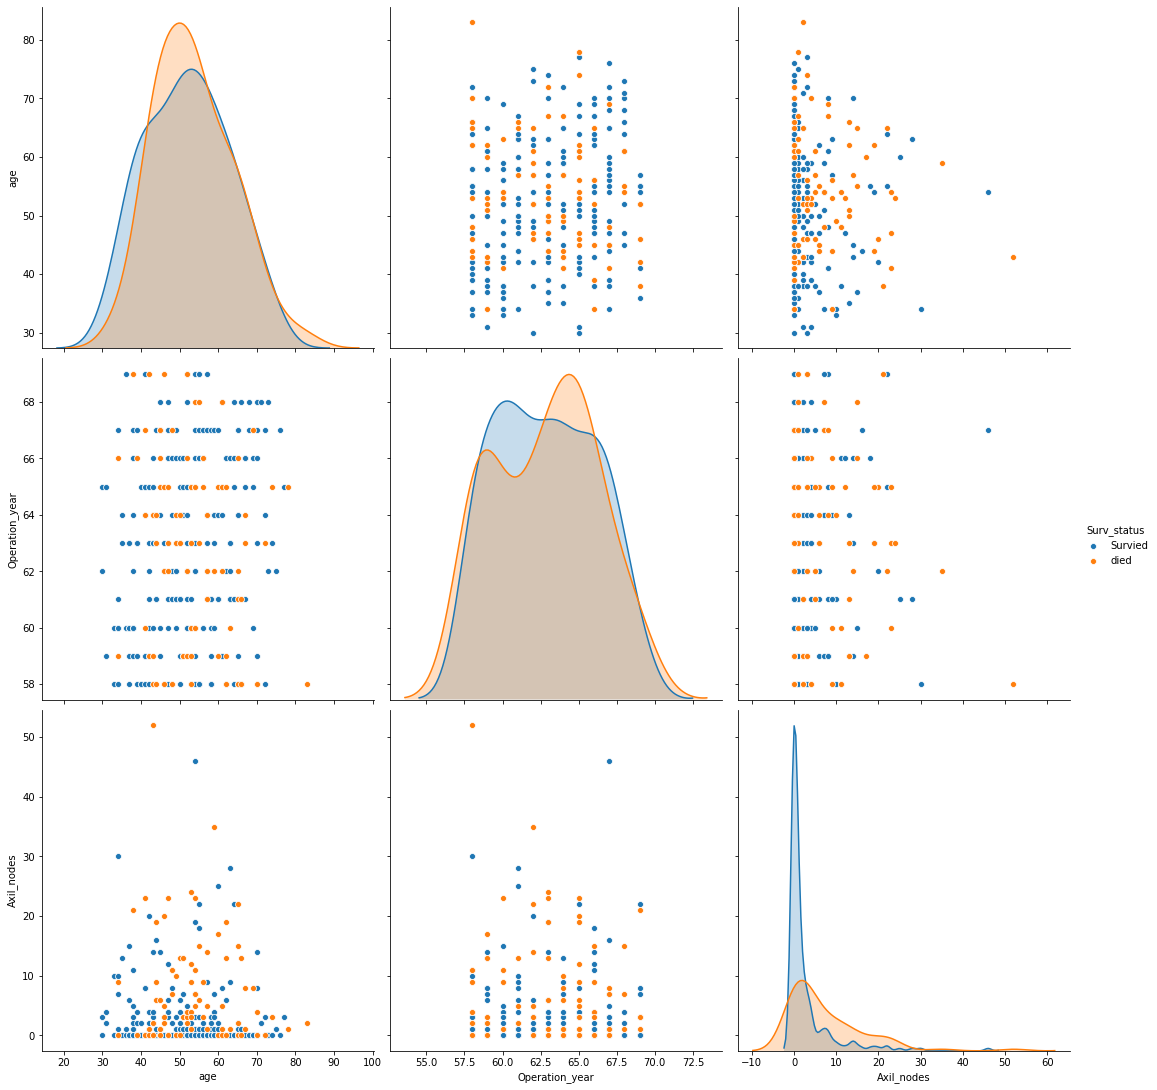

In [63]:
sns.pairplot(df, hue = "Surv_status",height =5)

<function matplotlib.pyplot.show(*args, **kw)>

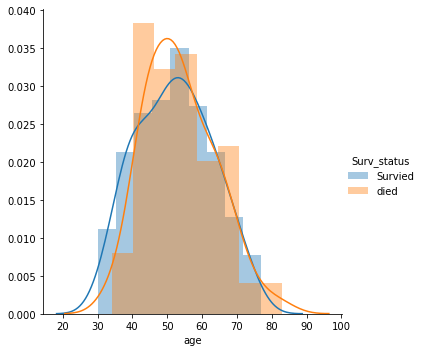

In [64]:
sns.FacetGrid(df, hue ="Surv_status", height = 5).map(sns.distplot,"age").add_legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

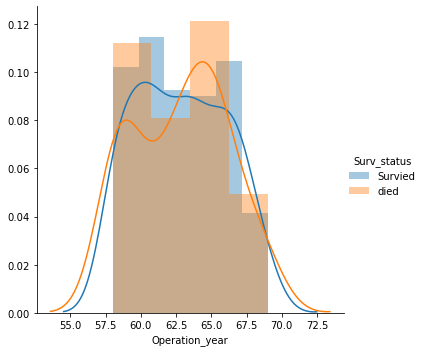

In [65]:
sns.FacetGrid(df, hue ="Surv_status", height = 5).map(sns.distplot,"Operation_year").add_legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

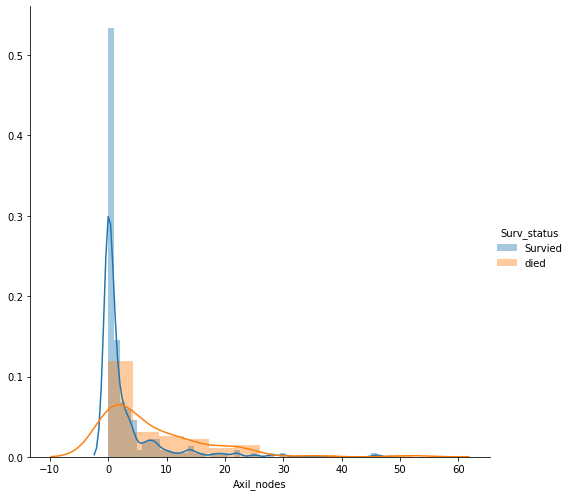

In [66]:
sns.FacetGrid(df, hue ="Surv_status", height = 7).map(sns.distplot,"Axil_nodes").add_legend()
plt.show

[0.04918033 0.08852459 0.15081967 0.17377049 0.18032787 0.13442623
 0.13442623 0.05901639 0.02295082 0.00655738]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


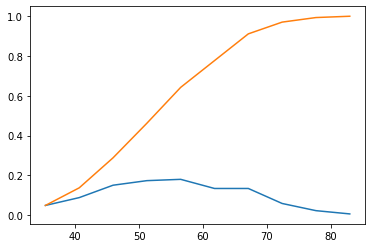

In [80]:
counts, bins_edges = np.histogram(df["age"], bins = 10, density = True)
pdf = counts/sum(counts)
print(pdf)
print(bins_edges)
cdf = np.cumsum(pdf)
plt.plot(bins_edges[1:],pdf)
plt.plot(bins_edges[1:], cdf)


[0.20655738 0.09180328 0.0852459  0.07540984 0.09836066 0.09836066
 0.09180328 0.09180328 0.08196721 0.07868852]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


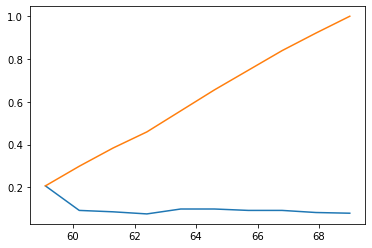

In [77]:
counts, bins_edges = np.histogram(df["Operation_year"], bins = 10, density = True)
pdf = counts/sum(counts)
print(pdf)
print(bins_edges)
cdf = np.cumsum(pdf)
plt.plot(bins_edges[1:],pdf)
plt.plot(bins_edges[1:], cdf)

[0.7704918  0.09836066 0.05901639 0.02622951 0.0295082  0.00655738
 0.00327869 0.         0.00327869 0.00327869]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


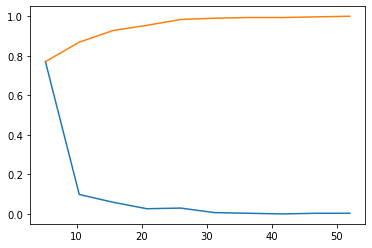

In [78]:
counts, bins_edges = np.histogram(df["Axil_nodes"], bins = 10, density = True)
pdf = counts/sum(counts)
print(pdf)
print(bins_edges)
cdf = np.cumsum(pdf)
plt.plot(bins_edges[1:],pdf)
plt.plot(bins_edges[1:], cdf)

In [79]:
""""Survived= df.loc[df["Surv_status"]== "Survived"]
Died = df.loc[df["Surv_status"]=="Died"]


plt.figure(figsize=(20,5))
i=1
for state in (list(df.columns)[:-1]):
#survived
    plt.subplot(1,3,i)
    Counts , bin_edges = np.histogram(Survived[state],bins=20,density=True)
    pdf=Counts/sum(Counts)
    cdf = np.cumsum(Counts)
    plt.plot(bin_edges[1:],cdf,label="cdf of survived",color="red")
    plt.plot(bin_edges[1:],pdf,label="pdf of survived",color="black")

#Death
    Counts , bin_edges = np.histogram(Died[state],bins=20,density=True)
    pdf=Counts/sum(Counts)
    cdf = np.cumsum(Counts)
    plt.plot(bin_edges[1:],cdf,label="cdf of Death")
    plt.plot(bin_edges[1:],pdf,label="pdf of Death")
    plt.xlabel(state)
    plt.grid()
    plt.legend()
    i+=1
plt.show()"""

'"Survived= df.loc[df["Surv_status"]== "Survived"]\nDied = df.loc[df["Surv_status"]=="Died"]\n\n\nplt.figure(figsize=(20,5))\ni=1\nfor state in (list(df.columns)[:-1]):\n#survived\n    plt.subplot(1,3,i)\n    Counts , bin_edges = np.histogram(Survived[state],bins=20,density=True)\n    pdf=Counts/sum(Counts)\n    cdf = np.cumsum(Counts)\n    plt.plot(bin_edges[1:],cdf,label="cdf of survived",color="red")\n    plt.plot(bin_edges[1:],pdf,label="pdf of survived",color="black")\n\n#Death\n    Counts , bin_edges = np.histogram(Died[state],bins=20,density=True)\n    pdf=Counts/sum(Counts)\n    cdf = np.cumsum(Counts)\n    plt.plot(bin_edges[1:],cdf,label="cdf of Death")\n    plt.plot(bin_edges[1:],pdf,label="pdf of Death")\n    plt.xlabel(state)\n    plt.grid()\n    plt.legend()\n    i+=1\nplt.show()'

********************************* Box Plot ***********************************************


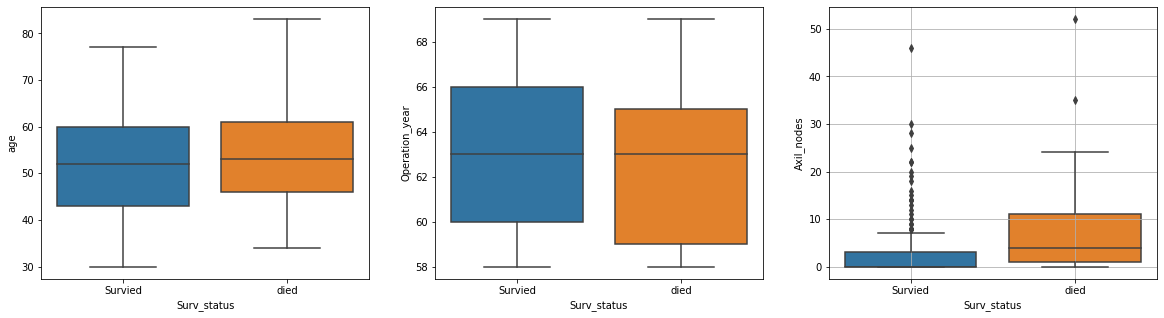

*********************************** Violin Plot ******************************************


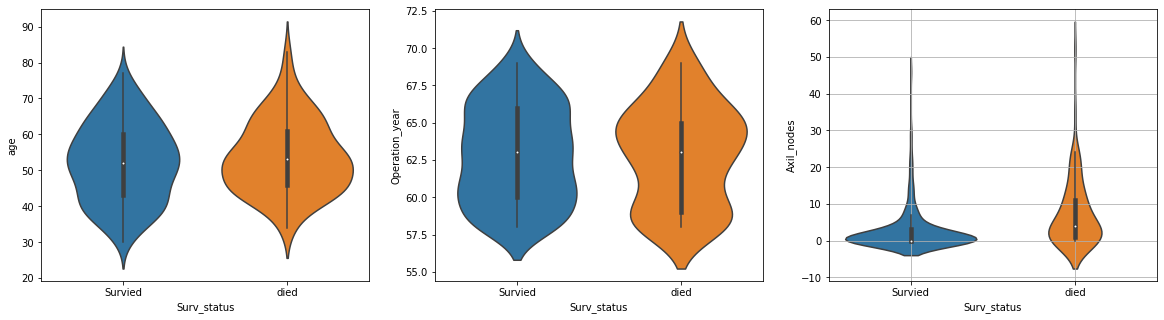

In [81]:
# Box_plot
print("********************************* Box Plot ***********************************************")
plt.figure(figsize=(20,5))
j=1
for features in (list(df.columns)[:-1]):  
    plt.subplot(1,3,j); j+=1 
    sns.boxplot(x= 'Surv_status',y= features,data=df)
plt.grid()    
plt.show()

print("*********************************** Violin Plot ******************************************")
# violin_plot
plt.figure(figsize=(20,5))
k=1
for features in (list(df.columns)[:-1]):  
    plt.subplot(1,3,k); k+=1 
    sns.violinplot(x= 'Surv_status',y= features,data=df)
plt.grid()
plt.show()